# What Is Hugging Face?

Hugging Face began as a chatbot startup and later shifted its focus toward open-source technologies for natural language processing. Its most well-known product is the **Transformers** library, which significantly lowers the barrier to working with NLP. By offering ready-to-use, pre-trained models, the library reduces the complexity typically involved in NLP tasks. These models are based on transformer architectures, which are recognized for enabling large-scale language processing with high accuracy.

A key idea behind Hugging Face is making advanced AI more widely available. Thanks to its user-friendly tools and model repositories, people with different levels of experience can work with transformer-based solutions without requiring strong machine learning backgrounds or large computing power.

## Getting Started with Hugging Face

There are several ways to use Hugging Face. The most basic one is through its official website:
[https://huggingface.co/](https://huggingface.co/)
To begin, users need to create an account on the platform.

## Main Sections of the Platform

The Hugging Face website is organized into three important sections:

* **Models**
* **Datasets**
* **Spaces**

Working with **Models** and **Datasets** requires knowledge of Python, the Transformers library, and a machine learning framework. However, users without programming experience can still interact with AI models through **Spaces**, which allow hands-on experimentation directly in the browser.

## Hugging Face Models

![Image](https://miro.medium.com/v2/resize:fit:700/0*QtBQoPuVxEu_MNxw.png)

The Hugging Face Model Hub serves as a central repository of pre-trained models covering tasks such as natural language processing, computer vision, and audio processing. These models are provided both by the Hugging Face team and the wider community and include well-known architectures such as BERT, GPT, and T5. Because the models are pre-trained on large datasets, they can be adapted efficiently to new tasks. Each model is accompanied by a model card that explains its intended use, limitations, and performance characteristics. It is important to note that more advanced models may require substantial computational resources, and some models may have licenses that restrict their commercial use.

## Hugging Face Transformers

Transformers are deep learning model architectures that are particularly effective at capturing context and meaning in language. The Transformers library includes a wide range of pre-trained models and tools for fine-tuning, supporting tasks such as text classification, translation, summarization, and tokenization.

Because these models are already trained, they can be integrated into projects with only a few lines of code. This significantly reduces the time and effort needed compared to training models from scratch and makes advanced AI techniques more accessible.

## Hugging Face Datasets

![Image](https://miro.medium.com/v2/resize:fit:700/0*-aUtdlgNvXC7R46F.png)

Hugging Face provides a dedicated Datasets library that enables easy access to a wide variety of datasets used in machine learning. These datasets include text, audio, image, and tabular data from many domains and languages. They are designed to integrate smoothly with other Hugging Face tools, such as Transformers and Tokenizers. When working with datasets, users should be aware that large collections of data may require significant storage and memory resources. Additionally, datasets may come with usage restrictions or licenses, and the data may require further cleaning before being applied to specific tasks.

## Hugging Face Spaces

![Image](https://miro.medium.com/v2/resize:fit:700/0*TWJTL_VkRAAES9qP.png)

Spaces are a platform within Hugging Face that allow users to deploy and share interactive machine learning applications. They make it possible to present models through online demos without maintaining a separate server. Hugging Face offers both free and paid Spaces, with free options providing limited hardware resources, including restricted RAM, CPU capacity, and temporary disk space. Spaces can be configured as public or private, depending on collaboration needs. Users should keep in mind that resource limitations and account type may affect performance and the number of Spaces that can be created.


## Hugging Face Pipelines

![Image](https://miro.medium.com/v2/1*-8CrN2uQpUOphkQCEkbbHw.jpeg)

Pipelines provide a simple and efficient way to use pre-trained models for **inference**. They abstract most of the internal complexity of the Transformers library and expose a clear, task-oriented API. Thanks to pipelines, users can apply advanced models without manually managing tokenization, model loading, or output decoding.

Pipelines support many common tasks, such as named entity recognition, masked language modeling, sentiment analysis, feature extraction, and question answering. They are designed to make experimentation fast and accessible, especially for users who want results with minimal setup.

## Example: pipeline

In [1]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")

res = generator("I love decorating christmas trees!", num_return_sequences=2)
res

Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I love decorating christmas trees!\nThis is my second style Christmas tree I have added to my collection!\nThis is my second Christmas tree I have added to my collection!\nThis is my second Christmas tree I have added to my collection!\nI love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decorations. I love Christmas decor

In [ ]:
import torch
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# pipeline
classifier = pipeline("sentiment-analysis")
res = classifier("I love decorating christmas trees!")
print("Output of sentiment-analysis pipeline:", res)

# model + tokenizer
# Makeing pipeline manually:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

model.eval()

with torch.no_grad():
    inputs = tokenizer(
        "I love decorating christmas trees!",
        return_tensors="pt"
    )
    outputs = model(**inputs)

    # softmax
    probs = F.softmax(outputs.logits, dim=-1)

    # najlepsza klasa
    score, predicted_class_id = torch.max(probs, dim=-1)

    label = model.config.id2label[predicted_class_id.item()]

result = [{
    "label": label,
    "score": score.item()
}]

print("Output of model inference:", result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Output of sentiment-analysis pipeline: [{'label': 'POSITIVE', 'score': 0.9997425675392151}]
Output of model inference: [{'label': 'POSITIVE', 'score': 0.9997425675392151}]


## Example: Tokenizer

In [2]:
from transformers import AutoTokenizer

text = "I love decorating christmas trees!"
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer(text, return_tensors="pt")
print("Output of tokenizer:", inputs)

tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))
print("Token IDs:", ids)

decoded = tokenizer.decode(ids)
print("Decoded text:", decoded)

Output of tokenizer: {'input_ids': tensor([[  101,  1045,  2293, 25545,  5844,  4234,  3628,   999,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Tokens: ['i', 'love', 'decor', '##ating', 'christmas', 'trees', '!']
Token IDs: [1045, 2293, 25545, 5844, 4234, 3628, 999]
Decoded text: i love decorating christmas trees!


## Example: Text Classification with a Public Dataset

This example demonstrates how to load a **popular text dataset** and apply a **pre-trained Transformer model** to perform sentiment analysis. The goal is to classify movie reviews as positive or negative using an existing model.

The example uses tools provided by **Hugging Face**, including the Datasets and Transformers libraries.

### Dataset and Model Used

* **Dataset**: IMDb movie reviews dataset (binary sentiment labels)
* **Task**: Sentiment analysis (positive / negative)
* **Approach**: Inference with a pre-trained model (no training phase)

In [35]:
from datasets import load_dataset
from transformers import pipeline

# Load the IMDb dataset
# The dataset contains movie reviews labeled as positive or negative
dataset = load_dataset("imdb")

# Create a sentiment-analysis pipeline
# This loads a pre-trained Transformer model suitable for text classification
classifier = pipeline("sentiment-analysis")

# Select a few examples from the test split
samples = dataset["test"]["text"][:5]

# Run sentiment analysis on each review
for i, review in enumerate(samples):
    result = classifier(review)[0]
    
    # Print the review number, predicted label, and confidence score
    print(f"Review {i + 1}:\n{review}")
    print(f"Predicted label: {result['label']}")
    print(f"Confidence score: {result['score']:.4f}")
    print("-" * 40)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Review 1:
I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they hav

## Example: Image Captioning with Transformers

This example demonstrates how to use a pre-trained Transformer model to generate a textual description of an image. The model analyzes the visual content and produces a caption, either with an optional text prompt (conditional captioning) or without it (unconditional captioning). This shows how computer vision and natural language processing can be combined using Hugging Face models.

### Dataset and Model Used

* **Dataset**: A single public image loaded from an external URL
* **Task**: Image captioning (generating a textual description of an image)
* **Approach**: Inference with a pre-trained Transformer-based vision–language model (no training phase)

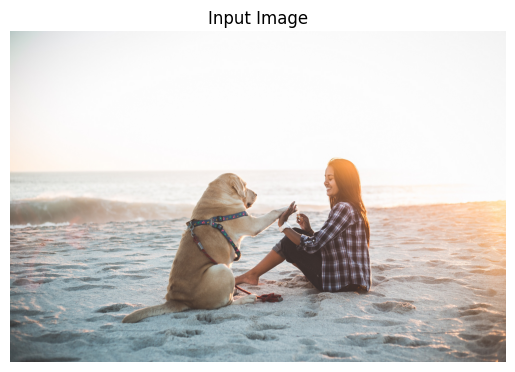

Model output IDs:
 tensor([[30522,  1037,  5855,  1997,  1037,  2450,  1998,  2014,  3899,  2006,
          1996,  3509,   102]])
Conditional caption:
a photography of a woman and her dog on the beach

Unconditional caption:
a woman sitting on the beach with her dog


In [34]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration

# Load the processor, which prepares images and text for the model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load the pre-trained BLIP model for image captioning
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# URL of the image to be processed
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

# Download the image and convert it to RGB format
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# Display the image using matplotlib
plt.imshow(raw_image)
plt.axis("off")  # Hide axis for better readability
plt.title("Input Image")
plt.show()

# ----- Conditional image captioning -----
# Text prompt guiding the caption generation
text = "a photography of"

# Prepare inputs: image + text prompt
inputs = processor(raw_image, text, return_tensors="pt") # pt: PyTorch tensors

# Generate a caption
out = model.generate(**inputs)
print("Model output IDs:\n", out)

# Decode and print the generated caption
print("Conditional caption:")
print(processor.decode(out[0], skip_special_tokens=True))

# ----- Unconditional image captioning -----
# Prepare inputs using only the image
inputs = processor(raw_image, return_tensors="pt") # pt: PyTorch tensors

# Generate a caption without a text prompt
out = model.generate(**inputs)

# Decode and print the generated caption
print("\nUnconditional caption:")
print(processor.decode(out[0], skip_special_tokens=True))

# Introduction to the NLP Preprocessing Pipeline (NLTK)

In this note we take **one short text** and pass it through **the entire classical NLP preprocessing pipeline**, explaining **what each method does, why it exists, and what changes in the data**.

![Pipeline](https://hackmd.io/_uploads/ryeV4q_TM-e.png)

![Image](./Screenshot%202025-12-15%20at%2013.07.59.png)

## 1. The input: raw text

Let’s start with a small document consisting of **three sentences**:

In [8]:
text = """
During the holidays,      families don't stress too much and just enjoy being together.
People can't stop smiling when the lights are on, and everyone isn't worried about work.
Children don't think about problems — they laugh, sing carols, and open gifts with joy.
Even if plans aren't perfect, moments like these don't disappear and can't be forgotten.
"""

### Why raw text is a problem

* contains punctuation and symbols
* mixed casing (`Language` vs `language`)
* words in different grammatical forms
* not numerical

Machine learning models **cannot work directly with text**.

---

## 2. Cleaning & Normalization

### What is it?

**Cleaning** removes irrelevant noise.
**Normalization** makes the text more consistent.

### Common operations

* lowercasing
* removing punctuation
* removing digits or special symbols
* normalizing whitespace

**Key idea:**
We lose some information (e.g. punctuation), but gain consistency.

In [9]:
import re

# Zamienia tekst na małe litery
clean_text = text.lower()

# Usuwa wszystkie znaki inne niż:
# - małe litery od a do z
# - spacje
# ^ w nawiasie oznacza negację (czyli „wszystko oprócz”)
clean_text = re.sub(r"[^a-z\s']", "", clean_text)

# Zamienia wiele spacji (np. po usuwaniu znaków) na jedną spację
# \s+ oznacza: jedna lub więcej spacji / znaków białych
# strip() usuwa spacje z początku i końca tekstu
clean_text = re.sub(r"\s+", " ", clean_text).strip()

clean_text

"during the holidays families don't stress too much and just enjoy being together people can't stop smiling when the lights are on and everyone isn't worried about work children don't think about problems they laugh sing carols and open gifts with joy even if plans aren't perfect moments like these don't disappear and can't be forgotten"

## 3. Tokenization

### What is tokenization?

Tokenization splits text into **smaller units called tokens**, most often **words**.

Why?

* models operate on lists, not raw strings
* later steps work token-by-token

**Key idea:**
Tokenization defines the **basic units of meaning** used by the pipeline.

In [10]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(clean_text)
tokens

['during',
 'the',
 'holidays',
 'families',
 'do',
 "n't",
 'stress',
 'too',
 'much',
 'and',
 'just',
 'enjoy',
 'being',
 'together',
 'people',
 'ca',
 "n't",
 'stop',
 'smiling',
 'when',
 'the',
 'lights',
 'are',
 'on',
 'and',
 'everyone',
 'is',
 "n't",
 'worried',
 'about',
 'work',
 'children',
 'do',
 "n't",
 'think',
 'about',
 'problems',
 'they',
 'laugh',
 'sing',
 'carols',
 'and',
 'open',
 'gifts',
 'with',
 'joy',
 'even',
 'if',
 'plans',
 'are',
 "n't",
 'perfect',
 'moments',
 'like',
 'these',
 'do',
 "n't",
 'disappear',
 'and',
 'ca',
 "n't",
 'be',
 'forgotten']

In [11]:
from nltk.tokenize import WhitespaceTokenizer

tokenizer = WhitespaceTokenizer()
tokens2 = tokenizer.tokenize(clean_text)

tokens2

['during',
 'the',
 'holidays',
 'families',
 "don't",
 'stress',
 'too',
 'much',
 'and',
 'just',
 'enjoy',
 'being',
 'together',
 'people',
 "can't",
 'stop',
 'smiling',
 'when',
 'the',
 'lights',
 'are',
 'on',
 'and',
 'everyone',
 "isn't",
 'worried',
 'about',
 'work',
 'children',
 "don't",
 'think',
 'about',
 'problems',
 'they',
 'laugh',
 'sing',
 'carols',
 'and',
 'open',
 'gifts',
 'with',
 'joy',
 'even',
 'if',
 'plans',
 "aren't",
 'perfect',
 'moments',
 'like',
 'these',
 "don't",
 'disappear',
 'and',
 "can't",
 'be',
 'forgotten']

In [12]:
differences = set(tokens) ^ set(tokens2) # exclusive-or 
differences

{"aren't", 'ca', "can't", 'do', "don't", 'is', "isn't", "n't"}

## 4. Stop Word Removal

### What are stop words?

Stop words are **very frequent function words** that usually carry little meaning on their own.

Examples:

```
is, a, the, of, and, to, for
```

### Why remove them?

* they dominate frequency counts
* often unhelpful for tasks like classification or topic modeling
* reduce dimensionality

**Key idea:**
Stop word removal focuses the text on **content words**.

⚠️ Not always appropriate (e.g. language modeling, syntax).

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

filtered_tokens = [t for t in tokens if t not in stop_words]
filtered_tokens

['holidays',
 'families',
 "n't",
 'stress',
 'much',
 'enjoy',
 'together',
 'people',
 'ca',
 "n't",
 'stop',
 'smiling',
 'lights',
 'everyone',
 "n't",
 'worried',
 'work',
 'children',
 "n't",
 'think',
 'problems',
 'laugh',
 'sing',
 'carols',
 'open',
 'gifts',
 'joy',
 'even',
 'plans',
 "n't",
 'perfect',
 'moments',
 'like',
 "n't",
 'disappear',
 'ca',
 "n't",
 'forgotten']

## 5. Stemming vs Lemmatization

Words often appear in different forms:

```
process, processing, processed
```

We want to **reduce them to a common base**.

---

### 5.1 Stemming

#### What is stemming?

* rule-based suffix stripping
* fast and simple
* may produce non-words

In [14]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stems = [stemmer.stem(t) for t in filtered_tokens]
stems

['holiday',
 'famili',
 "n't",
 'stress',
 'much',
 'enjoy',
 'togeth',
 'peopl',
 'ca',
 "n't",
 'stop',
 'smile',
 'light',
 'everyon',
 "n't",
 'worri',
 'work',
 'children',
 "n't",
 'think',
 'problem',
 'laugh',
 'sing',
 'carol',
 'open',
 'gift',
 'joy',
 'even',
 'plan',
 "n't",
 'perfect',
 'moment',
 'like',
 "n't",
 'disappear',
 'ca',
 "n't",
 'forgotten']

### 5.2 Lemmatization

#### What is lemmatization?

* uses a dictionary and grammar
* returns valid base forms (lemmas)
* slower but more accurate

In [15]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
lemmas

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariaszlasa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['holiday',
 'family',
 "n't",
 'stress',
 'much',
 'enjoy',
 'together',
 'people',
 'ca',
 "n't",
 'stop',
 'smiling',
 'light',
 'everyone',
 "n't",
 'worried',
 'work',
 'child',
 "n't",
 'think',
 'problem',
 'laugh',
 'sing',
 'carol',
 'open',
 'gift',
 'joy',
 'even',
 'plan',
 "n't",
 'perfect',
 'moment',
 'like',
 "n't",
 'disappear',
 'ca',
 "n't",
 'forgotten']

#### Example: Stemming vs Lemmatization

In [18]:
text_e = "Children don't stop celebrating holidays."

import nltk
from nltk.tokenize import word_tokenize

# nltk.download('punkt')

tokens_e = word_tokenize(text_e.lower())
print(" ".join(tokens_e))

porter_stems = [stemmer.stem(token) for token in tokens_e]
print(" ".join(porter_stems))

wordnet_lemmas = [lemmatizer.lemmatize(token) for token in tokens_e]
print(" ".join(wordnet_lemmas))

children do n't stop celebrating holidays .
children do n't stop celebr holiday .
child do n't stop celebrating holiday .


## Example: Exploratory Data Analysis

After NLTK preprocessing, we already have:

* cleaned text
* tokens and lemmas
* noise reduced

Before training any model, we often perform **Exploratory Data Analysis (EDA)** to understand:

* what the text is about
* which words dominate
* whether preprocessing worked as expected

A **word cloud** is a simple but effective EDA tool.

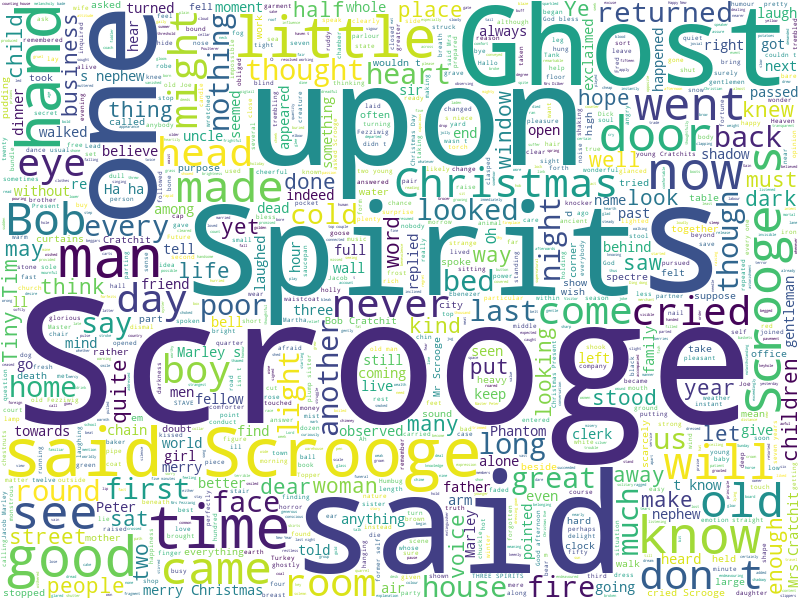

In [ ]:
# =========================================================
# 1. Load raw text from an RTF file
# =========================================================

with open("text.txt", "r", encoding="utf-8") as f:
    text = f.read()

# =========================================================
# 2. Cleaning & normalization
# =========================================================
# Purpose:
# - reduce noise
# - standardize the text
# - remove characters that do not carry lexical meaning
# - normalize line breaks and whitespace

import re

# Convert to lowercase to avoid duplicate tokens (e.g. "Language" vs "language")
text = text.lower()

# Replace line breaks and tabs with a single space
text = re.sub(r"[\n\r\t]+", " ", text)

# Keep only letters and whitespace
text = re.sub(r"[^a-z\s]", "", text)

# Collapse multiple spaces into one
text = re.sub(r"\s+", " ", text).strip()

# =========================================================
# 3. Tokenization
# =========================================================
# Purpose:
# - split text into basic linguistic units (words)
# - enable word-level processing

from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)

# =========================================================
# 4. Stop word removal
# =========================================================
# Purpose:
# - remove very frequent function words
# - focus on content-bearing words

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
tokens = [t for t in tokens if t not in stop_words]

# =========================================================
# 5. Lemmatization
# =========================================================
# Purpose:
# - reduce words to their dictionary base form (lemma)
# - merge different grammatical forms of the same word

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in tokens]

# =========================================================
# 6. Prepare features for visualization
# =========================================================
# WordCloud expects one long string rather than a list of tokens

long_string = " ".join(lemmas)

# =========================================================
# 7. Word Cloud visualization (Exploratory Data Analysis)
# =========================================================
# Purpose:
# - visually inspect word frequencies
# - verify the effect of preprocessing
# - understand the dominant concepts in the text

from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color="white",
    max_words=1000,
    width=800,
    height=600
)

wordcloud.generate(long_string)
wordcloud.to_image()

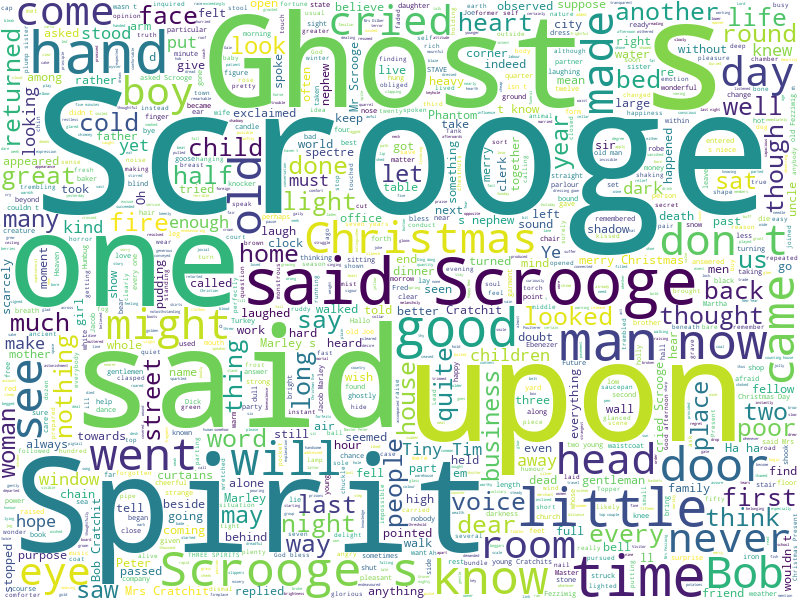

In [21]:
with open("text.txt", "r", encoding="utf-8") as f:
    text = f.read()

wordcloud.generate(text)
wordcloud.to_image()